In [ ]:
!git clone https://github.com/Leejunho123/5G_project.git
%cd 5G_project/DeepLearning/

Cloning into '5G_project'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 11200 (delta 124), reused 98 (delta 59), pack-reused 11028
Receiving objects: 100% (11200/11200), 245.91 MiB | 29.72 MiB/s, done.
Resolving deltas: 100% (2662/2662), done.
Checking out files: 100% (245/245), done.
/content/5G_project/DeepLearning


## 35 고차 미분 계산 그래프

### 35.1 tanh 함수 미분

In [ ]:
import numpy as np
from dezero.core import Function

class Tanh(Function):
  def forward(self,x):
    y = np.tanh(x)
    return y
  
  def backward(self, gy):
    y = self.outputs[0]()
    gx = gy * (1 - y * y)
    return gx

def tanh(x):
  return Tanh()(x)

### 35.3 고차 미분 계산 그래프 시각화

In [ ]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 0

for i in range(iters):
  gx = x.grad
  x.cleargrad()
  gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters+1)
plot_dot_graph(gx, verbose = False, to_file = 'tanh.png')

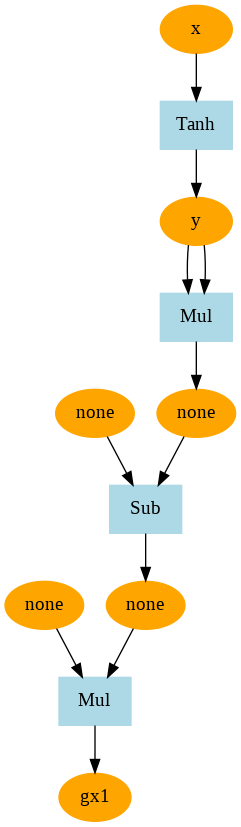

In [5]:
x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 3

for i in range(iters):
  gx = x.grad
  x.cleargrad()
  gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters+1)
plot_dot_graph(gx, verbose = False, to_file = 'tanh.png')

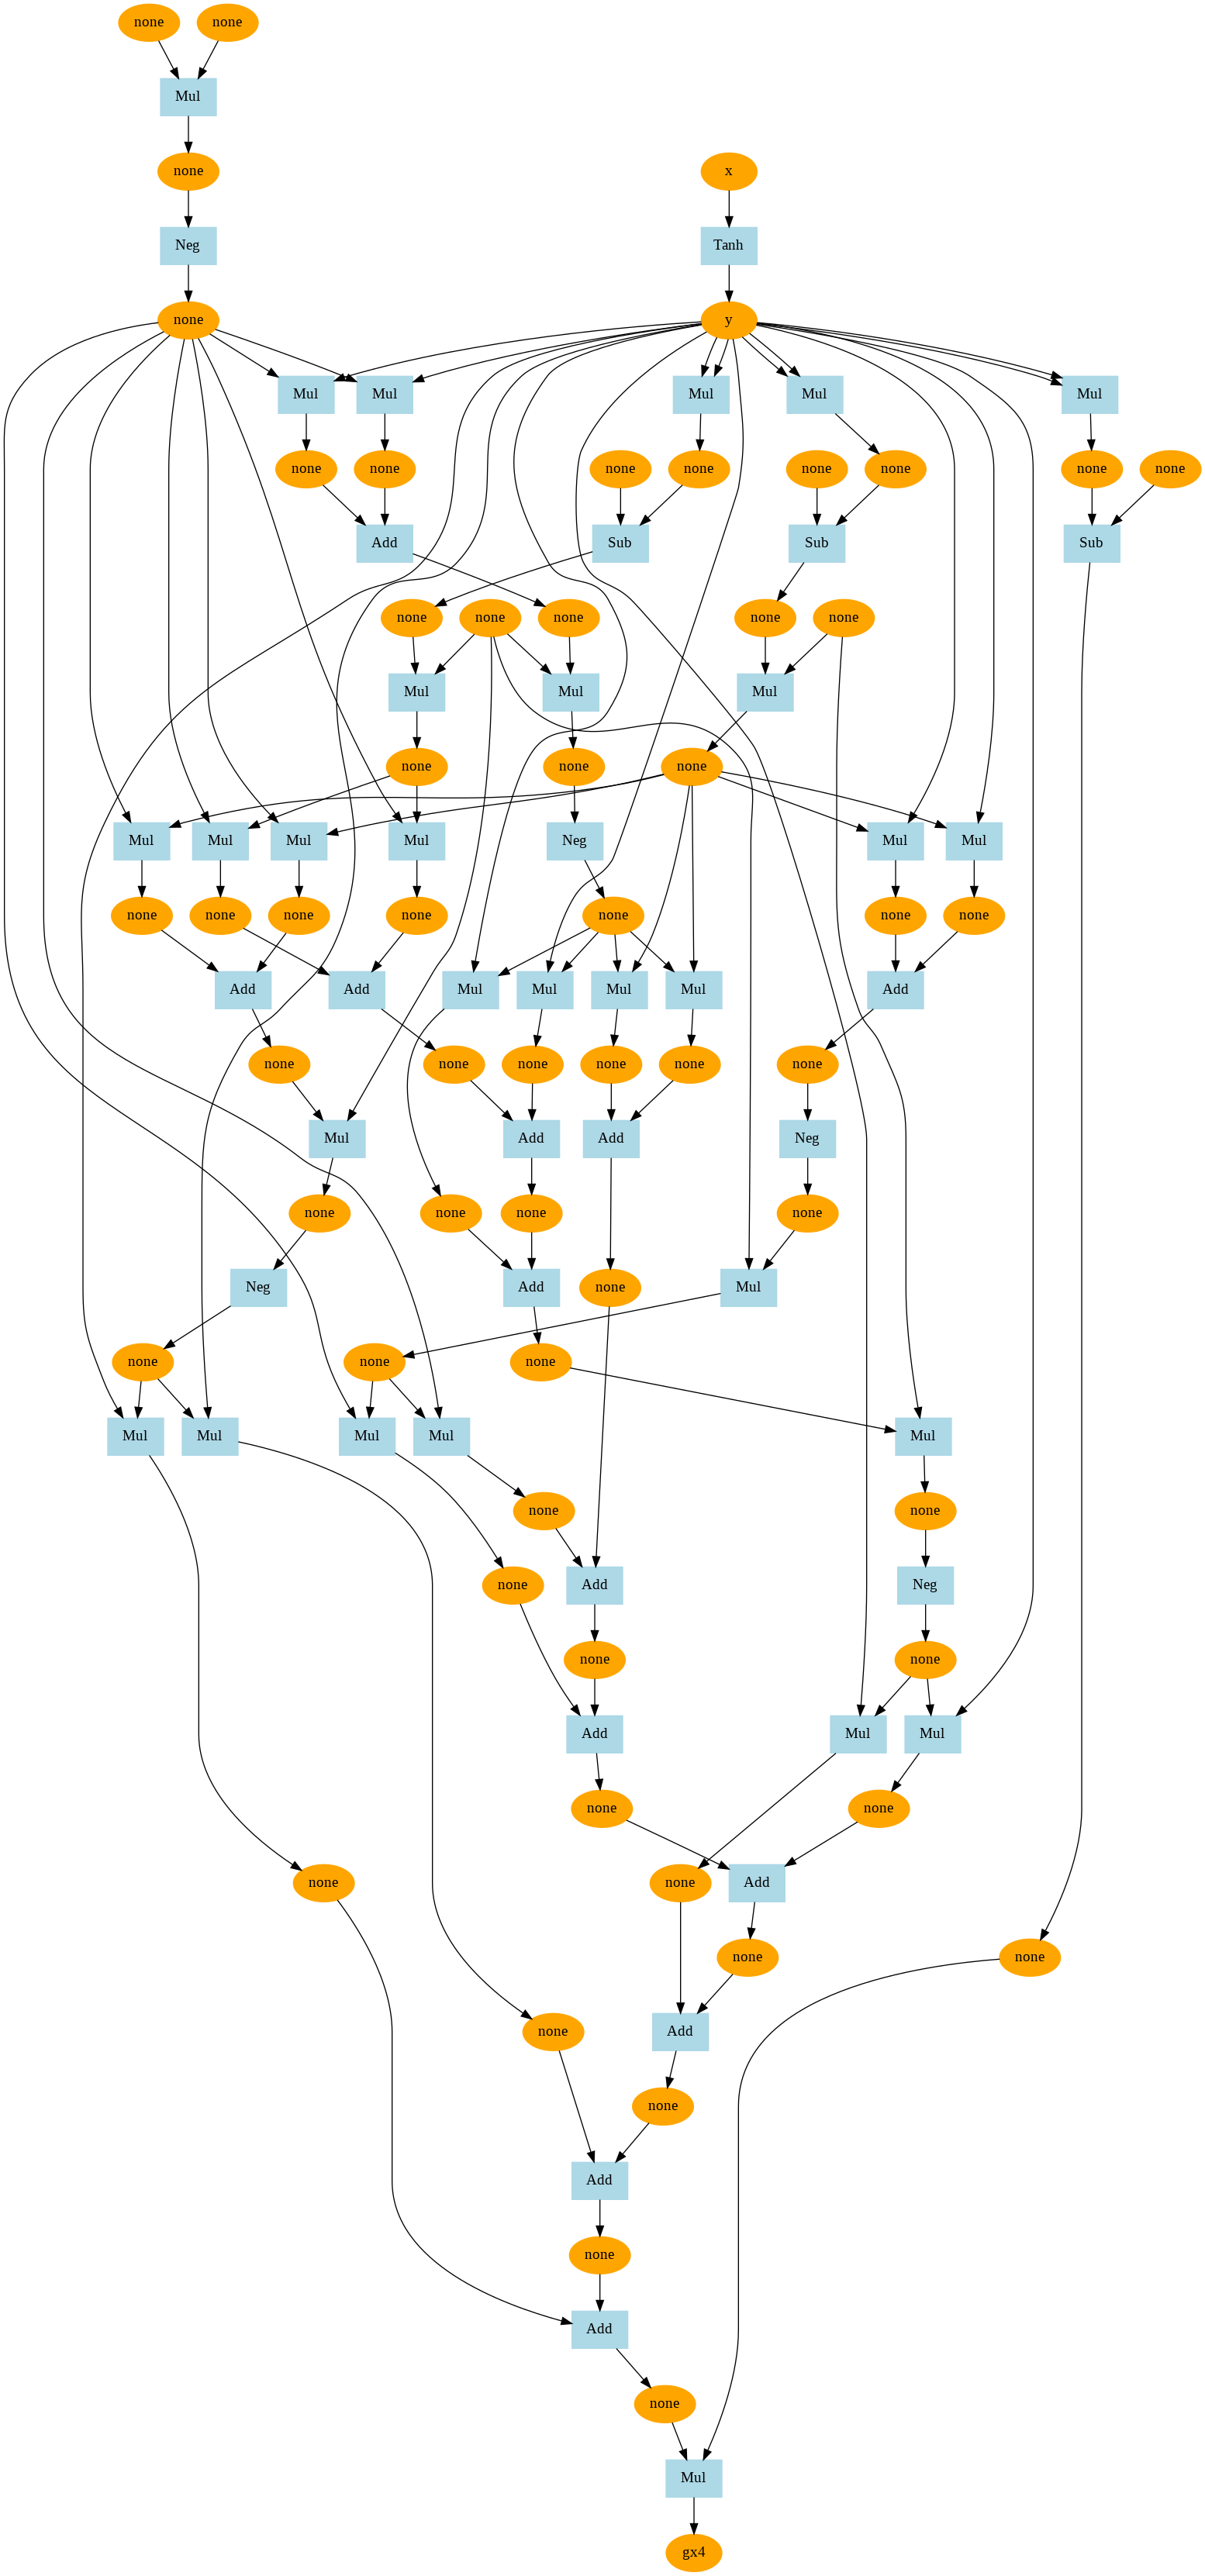